# Naive Bayes Classifier

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
sns.set(rc={'figure.figsize':(15,8)})

In [2]:
def plot_matrix(y_true,y_pred,title):
    cf_matrix= confusion_matrix(y_true, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues').set(title = title)
    
    return ax

In [3]:
vector_df = pd.read_csv('../data/matrix_tfidf_ngram.csv')

In [4]:
vector_df.head()

,Unnamed: 0,sp500_mean_label,sp500_last_label,usdx_mean_label,usdx_last_label,0,1,2,3,4,...,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344
0,0,1,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X = vector_df.iloc[:,5:]
y_usdx = vector_df.iloc[:,1:3]
y_sp500 = vector_df.iloc[:,3:5]

### USDX

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_usdx,test_size=0.10, random_state=1)

In [7]:
y_train_1 = y_train.iloc[:,0]
y_train_2 = y_train.iloc[:,1]

y_test_1 = y_test.iloc[:,0]
y_test_2 = y_test.iloc[:,1]

In [8]:
model1 = MultinomialNB()
model1.fit(X_train, y_train_1)
y_pred_tr_1 = model1.predict(X_train)
y_pred_te_1 = model1.predict(X_test)

accu_tr_1 = metrics.accuracy_score(y_train_1, y_pred_tr_1)
accu_te_1 = metrics.accuracy_score(y_test_1, y_pred_te_1)

f1_tr_1 = metrics.f1_score(y_train_1, y_pred_tr_1)
f1_te_1 = metrics.f1_score(y_test_1, y_pred_te_1)

roc_tr_1 = metrics.roc_auc_score(y_train_1, y_pred_tr_1)
roc_te_1 = metrics.roc_auc_score(y_test_1, y_pred_te_1)

In [9]:
model2 = MultinomialNB()
model2.fit(X_train, y_train_2)
y_pred_tr_2 = model2.predict(X_train)
y_pred_te_2 = model2.predict(X_test)

accu_tr_2 = metrics.accuracy_score(y_train_2, y_pred_tr_2)
accu_te_2 = metrics.accuracy_score(y_test_2, y_pred_te_2)

f1_tr_2 = metrics.f1_score(y_train_2, y_pred_tr_2)
f1_te_2 = metrics.f1_score(y_test_2, y_pred_te_2)

roc_tr_2 = metrics.roc_auc_score(y_train_2, y_pred_tr_2)
roc_te_2 = metrics.roc_auc_score(y_test_2, y_pred_te_2)

#### Accuracies

In [10]:
accu_df = pd.DataFrame([[accu_tr_1,accu_te_1,accu_tr_2,accu_te_2],
    ['Train','Test','Train','Test'],\
    ['Mean_Change_Label','Mean_Change_Label','Last_Day_Change_Label','Last_Day_Change_Label']
    ]).T

In [11]:
accu_df = accu_df.rename(columns={0:'Accuracy',1:'Set',2:'Label'})

Text(0.5, 1.0, 'Accucaries for Two labels')

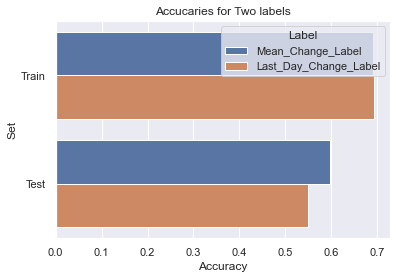

In [12]:
sns.barplot(data=accu_df, x='Accuracy',y='Set',hue='Label').set_title('Accucaries for Two labels')

### F1-Score

In [13]:
f1_df = pd.DataFrame([[f1_tr_1,f1_te_1,f1_tr_2,f1_te_2],
    ['Train','Test','Train','Test'],\
    ['Mean_Change_Label','Mean_Change_Label','Last_Day_Change_Label','Last_Day_Change_Label']
    ]).T

In [14]:
f1_df = f1_df.rename(columns={0:'F1-Score',1:'Set',2:'Label'})

Text(0.5, 1.0, 'F1-Scores for Two labels')

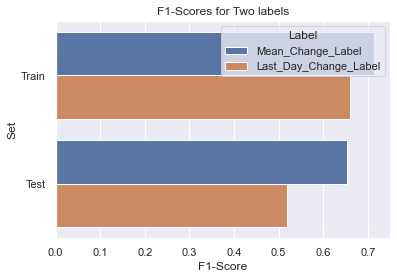

In [15]:
sns.barplot(data=f1_df, x='F1-Score',y='Set',hue='Label').set_title('F1-Scores for Two labels')

### AUC_ROC Score

In [16]:
roc_df = pd.DataFrame([[roc_tr_1,roc_te_1,roc_tr_2,roc_te_2],
    ['Train','Test','Train','Test'],\
    ['Mean_Change_Label','Mean_Change_Label','Last_Day_Change_Label','Last_Day_Change_Label']
    ]).T

In [17]:
roc_df = roc_df.rename(columns={0:'AUC_ROC-Score',1:'Set',2:'Label'})

Text(0.5, 1.0, 'AUC_ROC-Scores for Two labels')

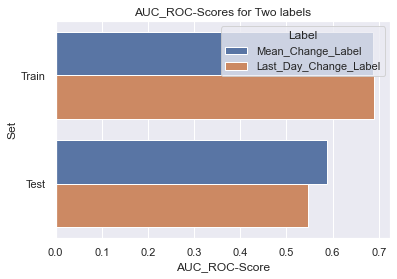

In [18]:
sns.barplot(data=roc_df, x='AUC_ROC-Score',y='Set',hue='Label').set_title('AUC_ROC-Scores for Two labels')

### Confusion Matrices

In [19]:
sns.set(rc={'figure.figsize':(10,8)})

[Text(0.5, 1.0, 'CFM for Train Mean_Change_Label')]

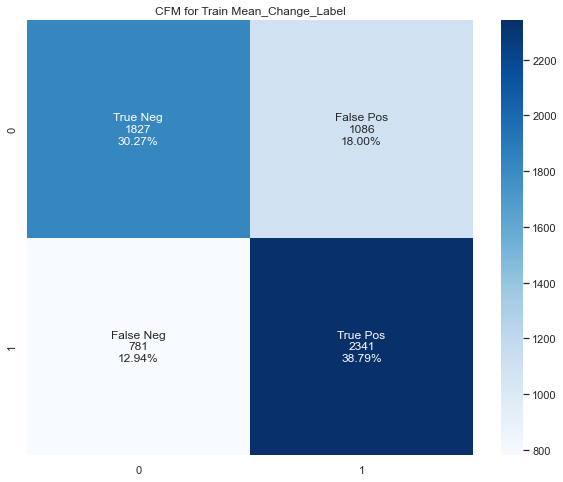

In [20]:
plot_matrix(y_train_1,y_pred_tr_1,'CFM for Train Mean_Change_Label')

[Text(0.5, 1.0, 'CFM for Test Mean_Change_Label')]

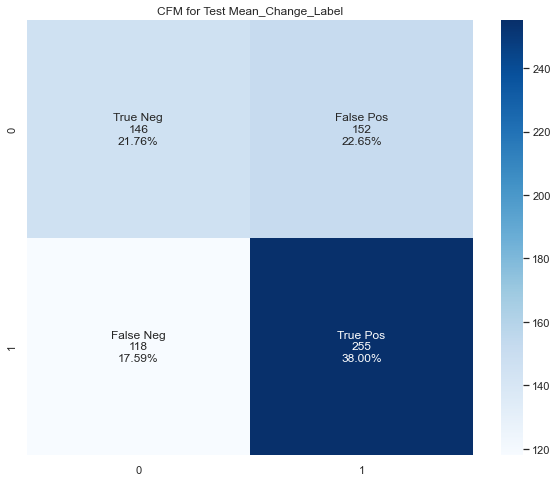

In [21]:
plot_matrix(y_test_1,y_pred_te_1,'CFM for Test Mean_Change_Label')

[Text(0.5, 1.0, 'CFM for Train Last_Day_Change_Label')]

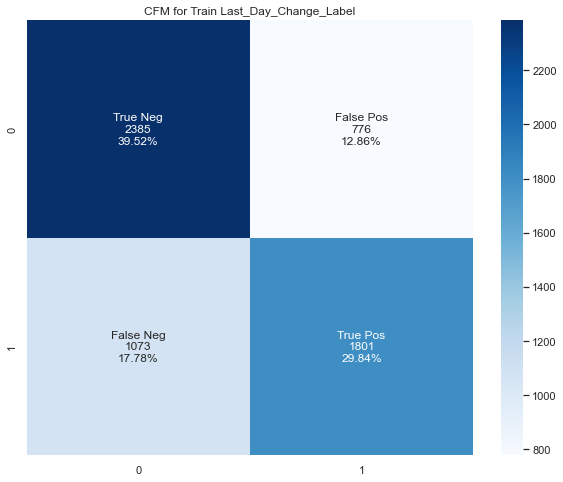

In [22]:
plot_matrix(y_train_2,y_pred_tr_2,'CFM for Train Last_Day_Change_Label')

[Text(0.5, 1.0, 'CFM for Test Last_Day_Change_Label')]

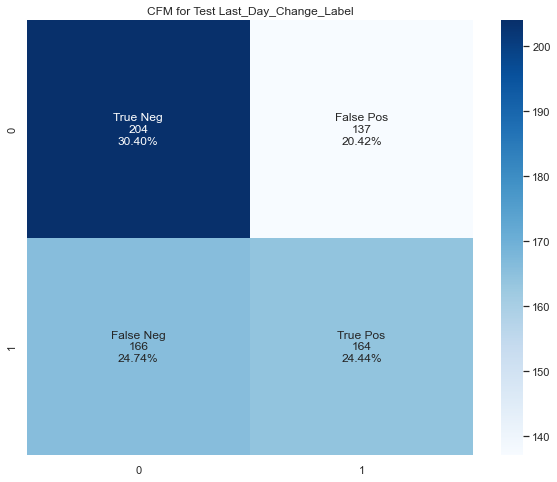

In [23]:
plot_matrix(y_test_2,y_pred_te_2,'CFM for Test Last_Day_Change_Label')

### S&P 500

In [24]:
sns.set(rc={'figure.figsize':(15,8)})

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_sp500,test_size=0.10, random_state=1)

In [28]:
y_train_1 = y_train.iloc[:,0]
y_train_2 = y_train.iloc[:,1]

y_test_1 = y_test.iloc[:,0]
y_test_2 = y_test.iloc[:,1]

In [29]:
model1 = MultinomialNB()
model1.fit(X_train, y_train_1)
y_pred_tr_1 = model1.predict(X_train)
y_pred_te_1 = model1.predict(X_test)

accu_tr_1 = metrics.accuracy_score(y_train_1, y_pred_tr_1)
accu_te_1 = metrics.accuracy_score(y_test_1, y_pred_te_1)

f1_tr_1 = metrics.f1_score(y_train_1, y_pred_tr_1)
f1_te_1 = metrics.f1_score(y_test_1, y_pred_te_1)

roc_tr_1 = metrics.roc_auc_score(y_train_1, y_pred_tr_1)
roc_te_1 = metrics.roc_auc_score(y_test_1, y_pred_te_1)

In [30]:
model2 = MultinomialNB()
model2.fit(X_train, y_train_2)
y_pred_tr_2 = model2.predict(X_train)
y_pred_te_2 = model2.predict(X_test)

accu_tr_2 = metrics.accuracy_score(y_train_2, y_pred_tr_2)
accu_te_2 = metrics.accuracy_score(y_test_2, y_pred_te_2)

f1_tr_2 = metrics.f1_score(y_train_2, y_pred_tr_2)
f1_te_2 = metrics.f1_score(y_test_2, y_pred_te_2)

roc_tr_2 = metrics.roc_auc_score(y_train_2, y_pred_tr_2)
roc_te_2 = metrics.roc_auc_score(y_test_2, y_pred_te_2)

#### Accuracies

In [31]:
accu_df = pd.DataFrame([[accu_tr_1,accu_te_1,accu_tr_2,accu_te_2],
    ['Train','Test','Train','Test'],\
    ['Mean_Change_Label','Mean_Change_Label','Last_Day_Change_Label','Last_Day_Change_Label']
    ]).T

In [32]:
accu_df = accu_df.rename(columns={0:'Accuracy',1:'Set',2:'Label'})

Text(0.5, 1.0, 'Accucaries for Two labels')

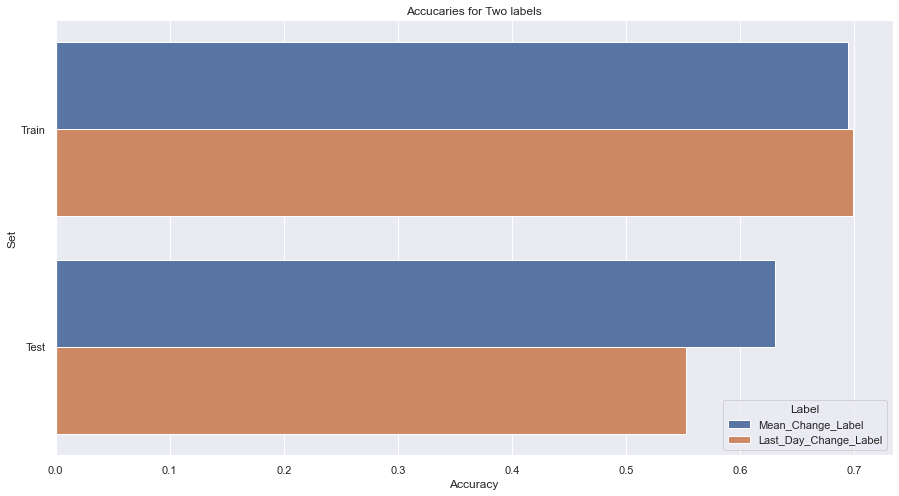

In [33]:
sns.barplot(data=accu_df, x='Accuracy',y='Set',hue='Label').set_title('Accucaries for Two labels')

### F1-Score

In [34]:
f1_df = pd.DataFrame([[f1_tr_1,f1_te_1,f1_tr_2,f1_te_2],
    ['Train','Test','Train','Test'],\
    ['Mean_Change_Label','Mean_Change_Label','Last_Day_Change_Label','Last_Day_Change_Label']
    ]).T

In [35]:
f1_df = f1_df.rename(columns={0:'F1-Score',1:'Set',2:'Label'})

Text(0.5, 1.0, 'F1-Scores for Two labels')

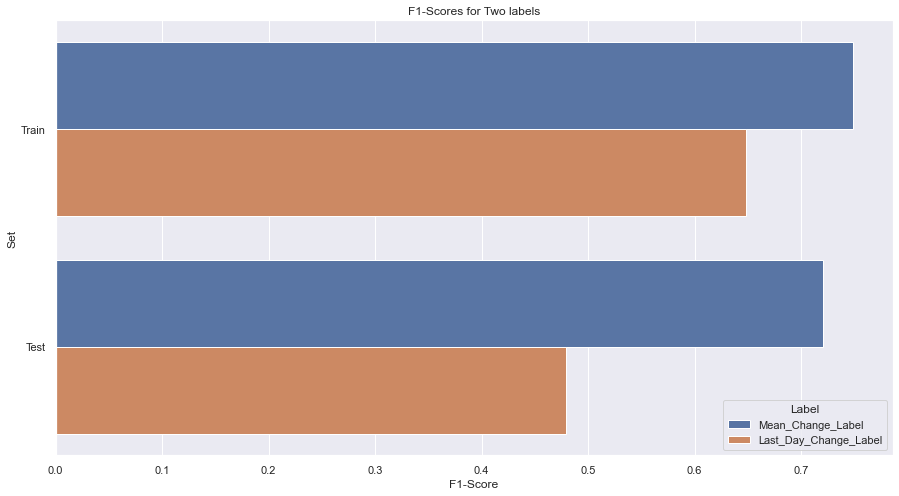

In [36]:
sns.barplot(data=f1_df, x='F1-Score',y='Set',hue='Label').set_title('F1-Scores for Two labels')

#### AUC_ROC Score

In [37]:
roc_df = pd.DataFrame([[roc_tr_1,roc_te_1,roc_tr_2,roc_te_2],
    ['Train','Test','Train','Test'],\
    ['Mean_Change_Label','Mean_Change_Label','Last_Day_Change_Label','Last_Day_Change_Label']
    ]).T

In [38]:
roc_df = roc_df.rename(columns={0:'AUC_ROC-Score',1:'Set',2:'Label'})

Text(0.5, 1.0, 'AUC_ROC-Scores for Two labels')

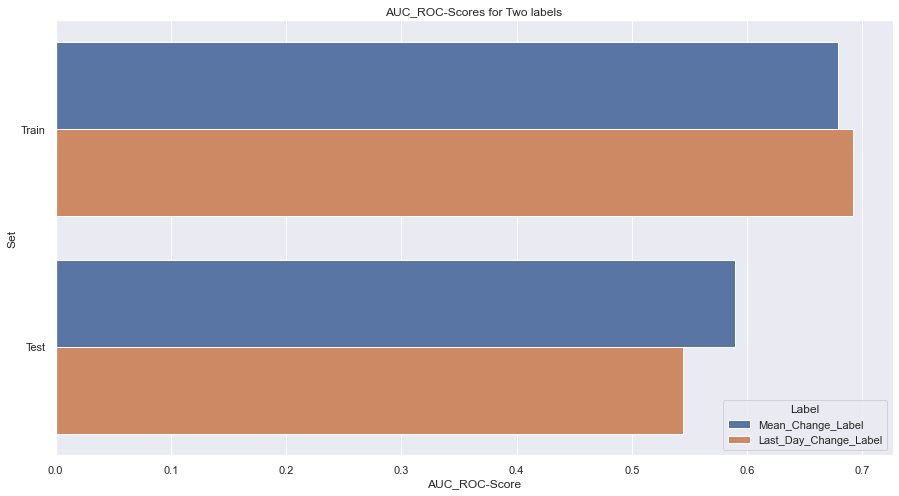

In [39]:
sns.barplot(data=roc_df, x='AUC_ROC-Score',y='Set',hue='Label').set_title('AUC_ROC-Scores for Two labels')

#### Confusion Matrices

In [40]:
sns.set(rc={'figure.figsize':(10,8)})

[Text(0.5, 1.0, 'CFM for Train Mean_Change_Label')]

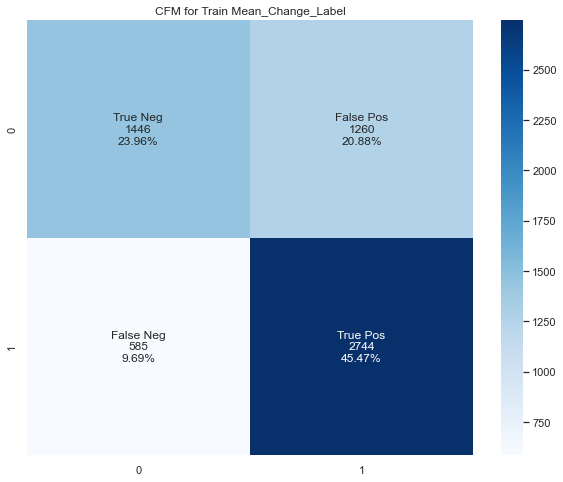

In [41]:
plot_matrix(y_train_1,y_pred_tr_1,'CFM for Train Mean_Change_Label')

[Text(0.5, 1.0, 'CFM for Test Mean_Change_Label')]

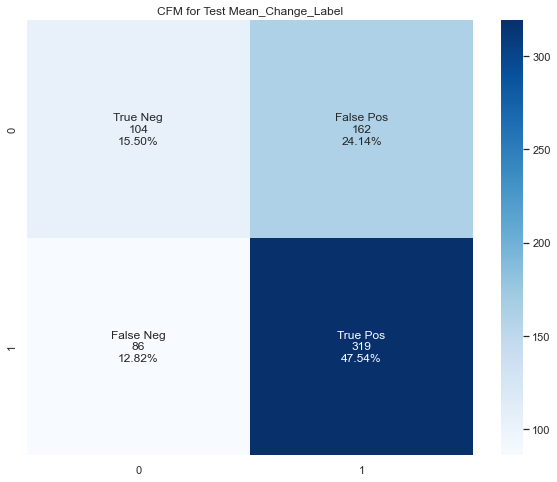

In [42]:
plot_matrix(y_test_1,y_pred_te_1,'CFM for Test Mean_Change_Label')

[Text(0.5, 1.0, 'CFM for Train Last_Day_Change_Label')]

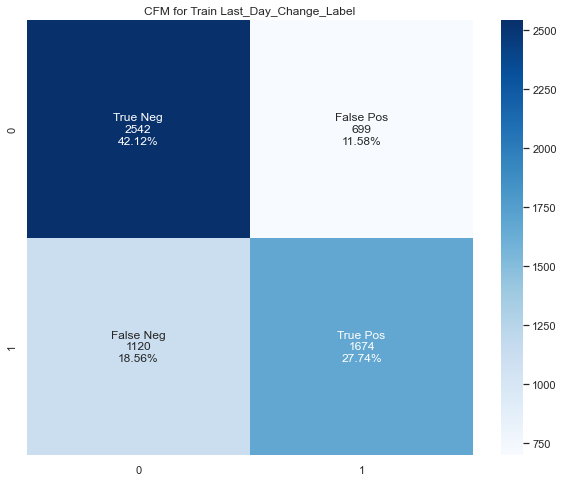

In [43]:
plot_matrix(y_train_2,y_pred_tr_2,'CFM for Train Last_Day_Change_Label')

[Text(0.5, 1.0, 'CFM for Test Last_Day_Change_Label')]

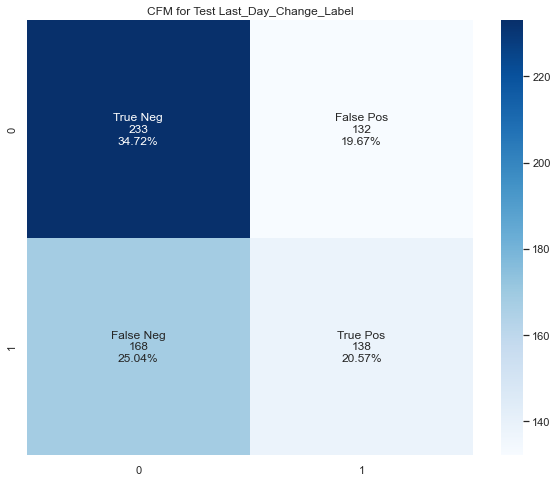

In [44]:
plot_matrix(y_test_2,y_pred_te_2,'CFM for Test Last_Day_Change_Label')